In [86]:
import pandas as pd

Edit this cell to read the file wanted. NOTE: will only work for csv files in the form of patient, features, outcome. 

In [87]:
filename = "selected_features_dyn.csv" # Add filename
data = pd.read_csv(filename) # Load in Data

Run the following cell for Random Forest Model:

Training Fold: 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 
---------------- Random Forest ----------------
Root Mean Squared Error:  14.24634288958834


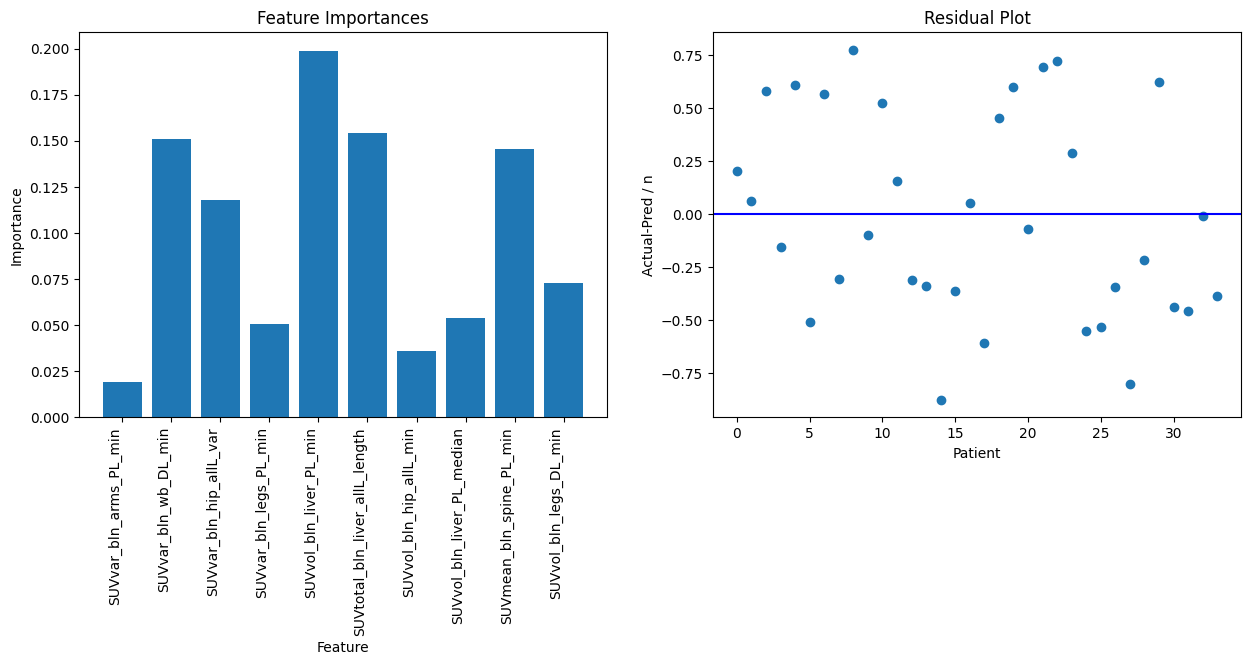

Feature Importance Values: , 0.01921874507454735, 0.150959551038571, 0.11776282116662291, 0.0505386129846102, 0.19901563722343082, 0.15411171419955505, 0.036035009405872585, 0.05363242968774373, 0.1456828125214079, 0.07304266669763851


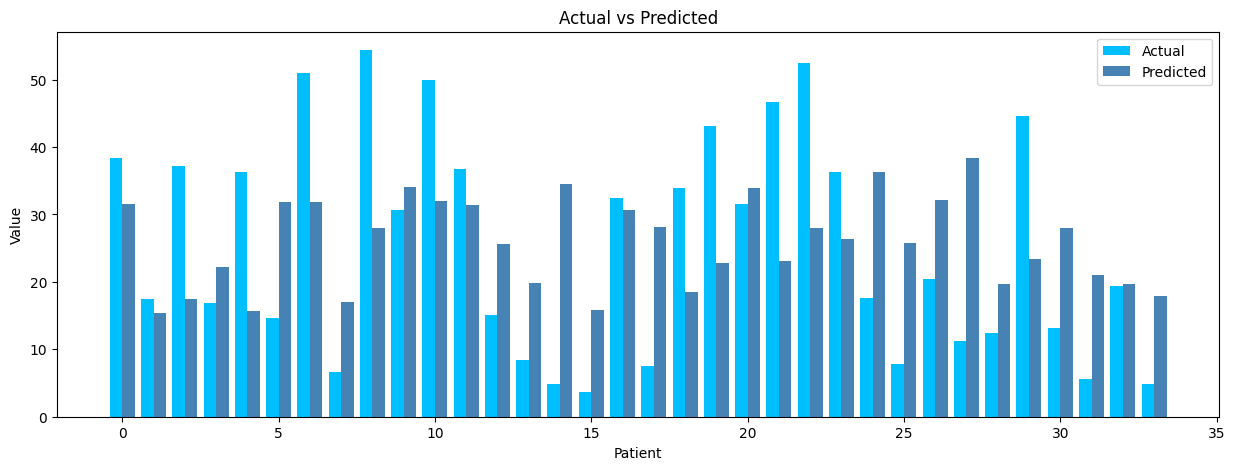

Actual: , 38.4, 17.4667, 37.2, 16.8667, 36.2667, 14.6667, 51.0333, 6.6667, 54.3667, 30.7, 49.8667, 36.8, 15.1, 8.4333, 4.8667, 3.6, 32.3667, 7.4667, 33.9667, 43.1667, 31.5, 46.7333, 52.5, 36.2333, 17.6333, 7.7667, 20.4333, 11.2, 12.4, 44.6, 13.1, 5.5667, 19.3333, 4.9
Predct: , 31.5266, 15.3682, 17.4519, 22.159, 15.626, 31.8684, 31.8368, 17.0513, 28.014, 34.0527, 32.0441, 31.4356, 25.6044, 19.8721, 34.5752, 15.8157, 30.581, 28.1419, 18.5031, 22.7665, 33.8988, 23.1404, 28.0076, 26.35, 36.2565, 25.7479, 32.0603, 38.3667, 19.6876, 23.4594, 27.9555, 21.0106, 19.649, 17.9468


In [88]:
%run RF.py 
RF(data)

Run the following cell for LightGBM. Add the number of trials you want optuna to run to tune parameters. 

[I 2023-04-07 13:33:06,091] A new study created in memory with name: no-name-54d3a21d-e679-4d6a-9971-51f28d9e4ef3
[I 2023-04-07 13:33:07,330] Trial 0 finished with value: 10.848175780409994 and parameters: {'n_estimators': 462, 'num_leaves': 131, 'learning_rate': 1.8489394881424879, 'max_depth': 21, 'min_child_samples': 6}. Best is trial 0 with value: 10.848175780409994.
[I 2023-04-07 13:33:08,526] Trial 1 finished with value: 6.7311360074794795 and parameters: {'n_estimators': 416, 'num_leaves': 65, 'learning_rate': 0.08531713363159966, 'max_depth': 4, 'min_child_samples': 5}. Best is trial 1 with value: 6.7311360074794795.
[I 2023-04-07 13:33:10,076] Trial 2 finished with value: 13.584503307200897 and parameters: {'n_estimators': 335, 'num_leaves': 163, 'learning_rate': 1.7677842427116037, 'max_depth': 11, 'min_child_samples': 2}. Best is trial 1 with value: 6.7311360074794795.
[I 2023-04-07 13:33:11,412] Trial 3 finished with value: 7.875882584112876 and parameters: {'n_estimators':

Best Parameters:  {'n_estimators': 367, 'num_leaves': 118, 'learning_rate': 0.23220826410391443, 'max_depth': 23, 'min_child_samples': 2}
Best Scorre: 5.473618438827291
Training Fold: 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 
------------ LightGBM ------------
RMSE:  14.226420860470194


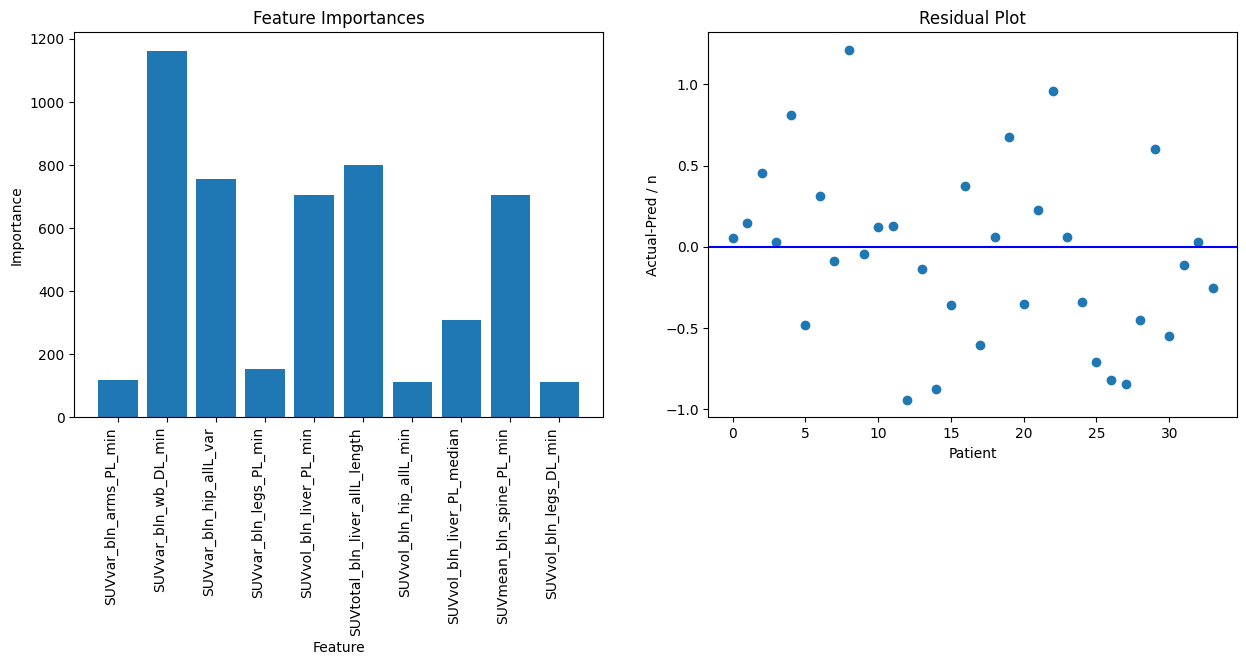

Feature Importance Values: , 118.44117647058823, 1162.7941176470588, 756.7058823529412, 153.52941176470588, 703.7352941176471, 799.8529411764706, 111.23529411764706, 309.55882352941177, 705.4117647058823, 110.29411764705883


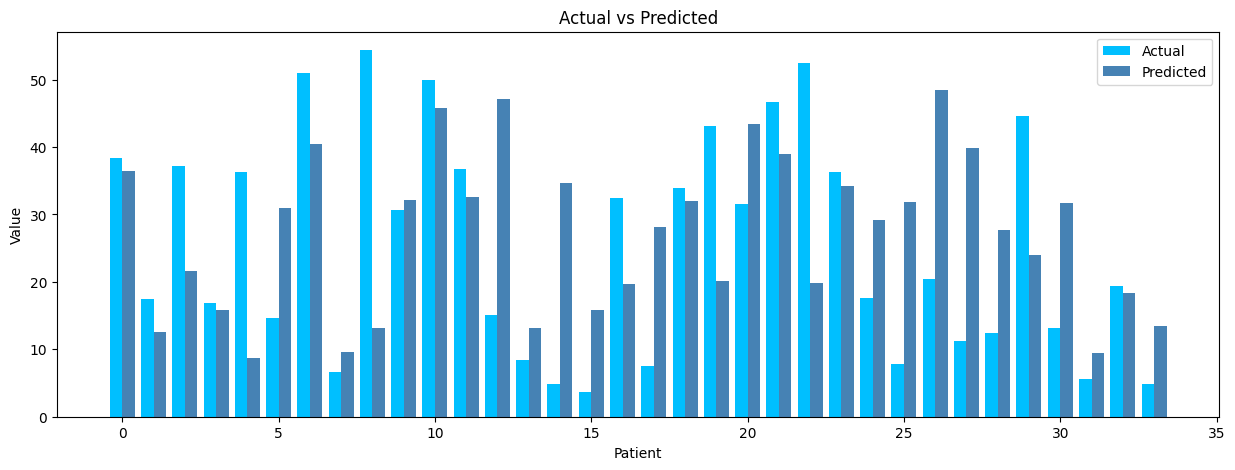

Actual: , 38.4, 17.4667, 37.2, 16.8667, 36.2667, 14.6667, 51.0333, 6.6667, 54.3667, 30.7, 49.8667, 36.8, 15.1, 8.4333, 4.8667, 3.6, 32.3667, 7.4667, 33.9667, 43.1667, 31.5, 46.7333, 52.5, 36.2333, 17.6333, 7.7667, 20.4333, 11.2, 12.4, 44.6, 13.1, 5.5667, 19.3333, 4.9
Predct: , 36.4715, 12.5346, 21.6729, 15.8282, 8.7045, 30.9646, 40.4506, 9.66, 13.1034, 32.1329, 45.7412, 32.542, 47.1032, 13.12, 34.6886, 15.8481, 19.6311, 28.1158, 31.9548, 20.0944, 43.45, 39.0077, 19.8618, 34.1632, 29.1717, 31.8592, 48.4023, 39.8122, 27.734, 24.0185, 31.7543, 9.3972, 18.4156, 13.5136


In [89]:
%run LightGBM.py 
# add your number of trails for optuna. longer trials -> better parameters, but longer runtime
n_trails = 150
lightGBMLOOOptuna(data, n_trails)

Run the follwing cell for XGBoost. 

[I 2023-04-07 13:48:14,477] A new study created in memory with name: no-name-edc16549-1cca-4f9e-ac80-b4dbc04582b3
[I 2023-04-07 13:48:17,278] Trial 0 finished with value: 6.9259122358301495 and parameters: {'max_depth': 9, 'learning_rate': 0.2030984817542345, 'n_estimators': 319, 'min_child_weight': 2, 'gamma': 0.5049512405677812, 'subsample': 0.6859443501357076, 'colsample_bytree': 0.2052591774175066, 'reg_alpha': 0.4702353328251537, 'reg_lambda': 0.3734582153891704}. Best is trial 0 with value: 6.9259122358301495.
[I 2023-04-07 13:48:19,604] Trial 1 finished with value: 14.320875940703186 and parameters: {'max_depth': 8, 'learning_rate': 0.6799718716396798, 'n_estimators': 308, 'min_child_weight': 1, 'gamma': 0.8100812471267187, 'subsample': 0.04806527391006166, 'colsample_bytree': 0.26374667318984624, 'reg_alpha': 0.20467656597665984, 'reg_lambda': 0.5872266671268425}. Best is trial 0 with value: 6.9259122358301495.
[I 2023-04-07 13:48:22,348] Trial 2 finished with value: 10.3404245

Best Parameters:  {'max_depth': 3, 'learning_rate': 0.09741615290504357, 'n_estimators': 289, 'min_child_weight': 1, 'gamma': 0.0860164493477552, 'subsample': 0.7056305507755096, 'colsample_bytree': 0.84662084507451, 'reg_alpha': 0.8575153105294572, 'reg_lambda': 0.568030869069031}
Best Scorre: 4.29221920137774
Training Fold: 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 
------------ XGBoost ------------
RMSE:  13.013177030285588


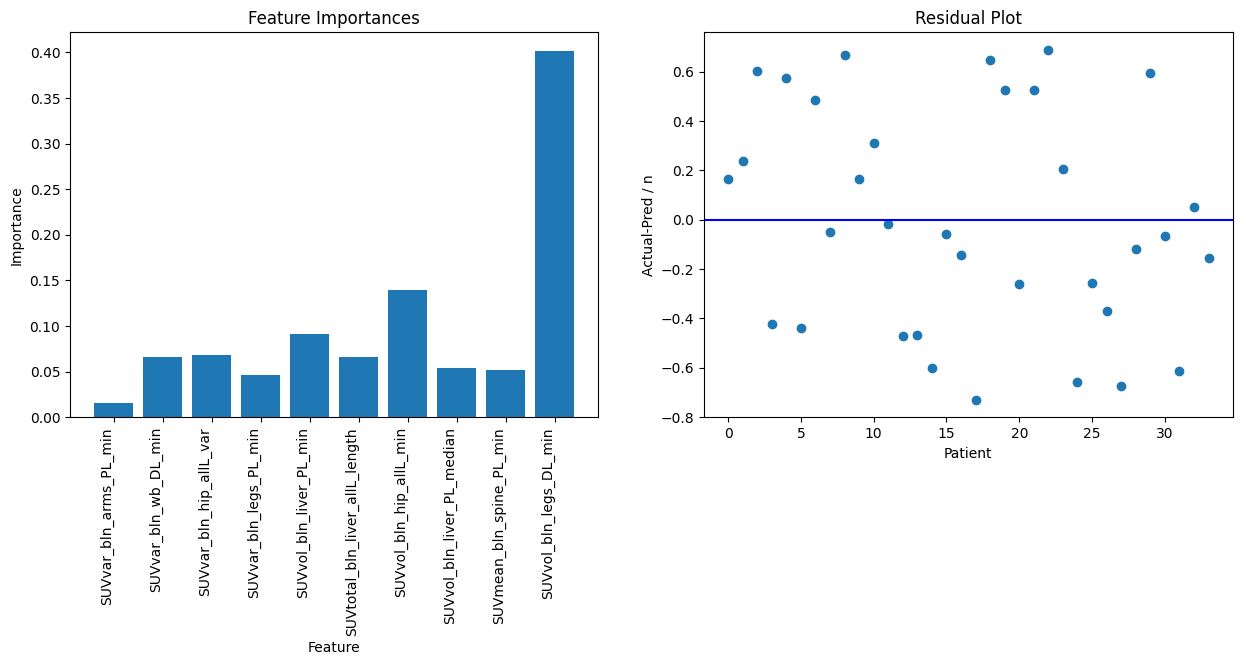

Feature Importance Values: , 0.015477401, 0.065964125, 0.068492435, 0.046552658, 0.09134378, 0.06600027, 0.13937026, 0.053576283, 0.051312536, 0.40191025


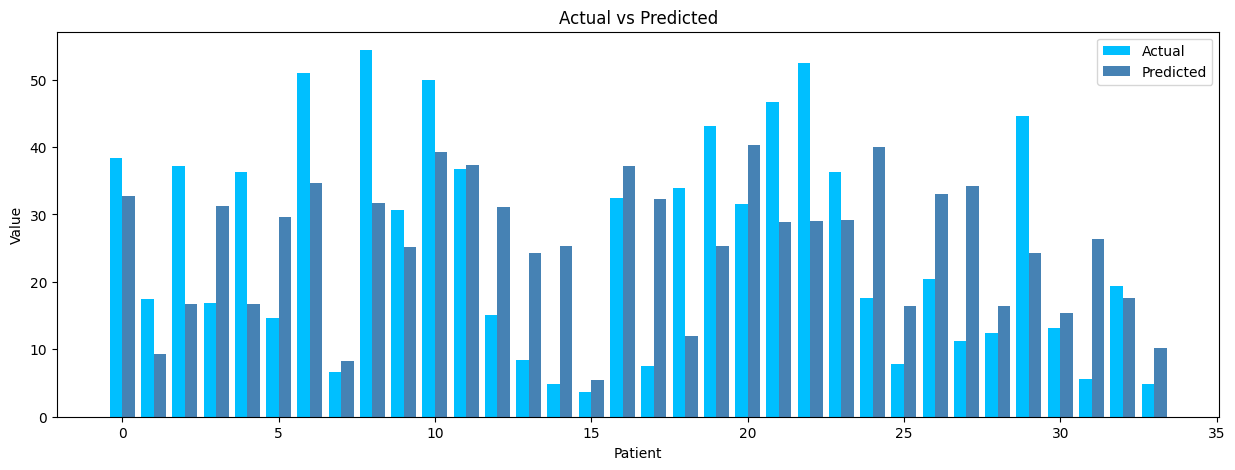

Actual: , 38.4, 17.4667, 37.2, 16.8667, 36.2667, 14.6667, 51.0333, 6.6667, 54.3667, 30.7, 49.8667, 36.8, 15.1, 8.4333, 4.8667, 3.6, 32.3667, 7.4667, 33.9667, 43.1667, 31.5, 46.7333, 52.5, 36.2333, 17.6333, 7.7667, 20.4333, 11.2, 12.4, 44.6, 13.1, 5.5667, 19.3333, 4.9
Predct: , 32.7569, 9.2936, 16.6904, 31.2602, 16.7174, 29.6028, 34.5851, 8.3047, 31.7032, 25.1376, 39.3029, 37.3423, 31.1499, 24.2747, 25.2586, 5.5045, 37.1776, 32.2748, 11.9908, 25.3363, 40.3054, 28.8201, 29.0537, 29.1981, 40.0576, 16.4625, 33.0445, 34.138, 16.4242, 24.3442, 15.3638, 26.4219, 17.6301, 10.1404


In [92]:
%run XGBoost.py 
n = 150 # edit the number of trials
lightGBMLOOOptuna(data, n)

Run the following cell for MultiLinearRegression. With no Feature Importance function built into the model I excluded that graph. However, it is possible to create it in the future, if needed. 

------------ LightGBM ------------
RMSE:  15.16184049681314


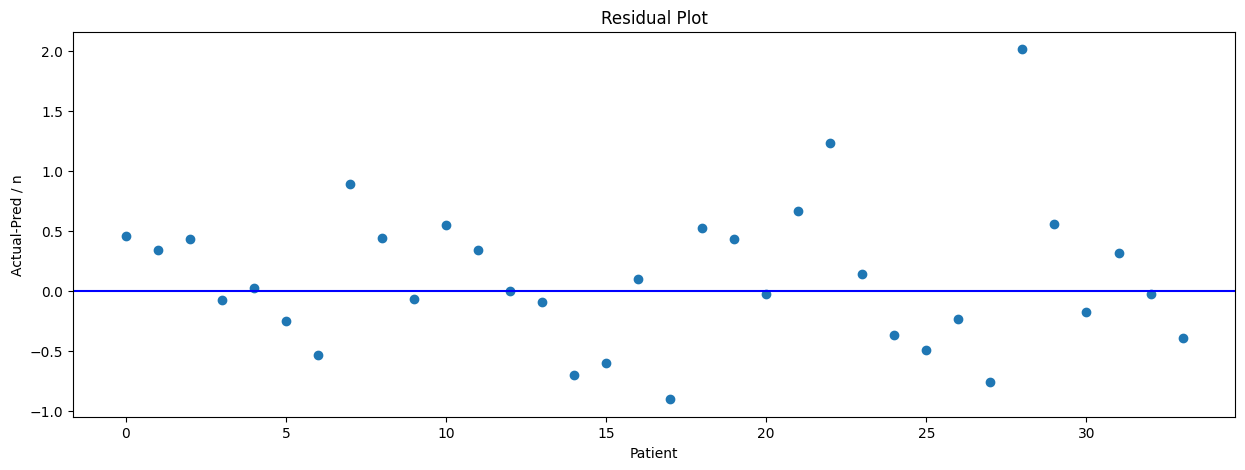

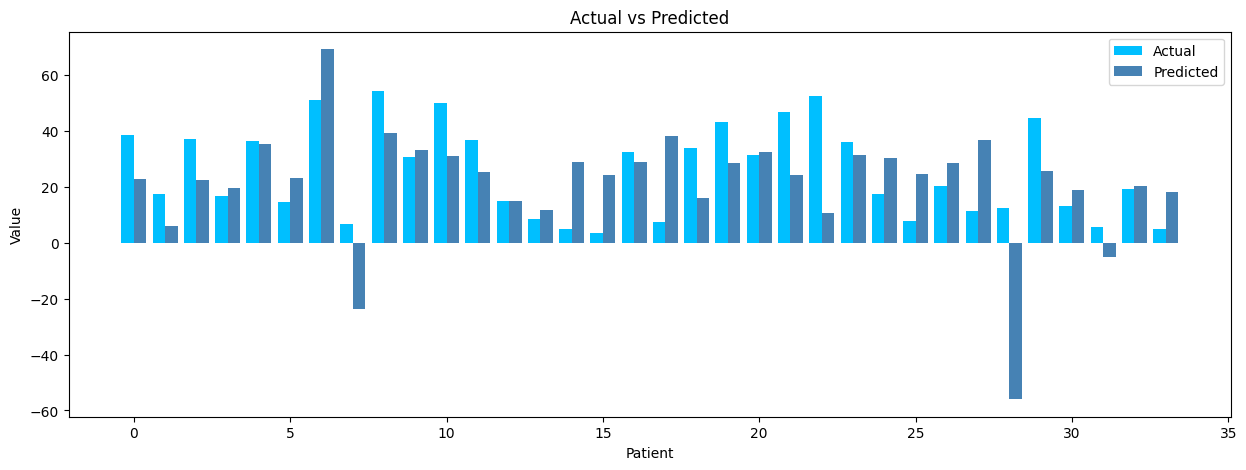

Actual: , 38.4, 17.4667, 37.2, 16.8667, 36.2667, 14.6667, 51.0333, 6.6667, 54.3667, 30.7, 49.8667, 36.8, 15.1, 8.4333, 4.8667, 3.6, 32.3667, 7.4667, 33.9667, 43.1667, 31.5, 46.7333, 52.5, 36.2333, 17.6333, 7.7667, 20.4333, 11.2, 12.4, 44.6, 13.1, 5.5667, 19.3333, 4.9
Predct: , 22.8336, 5.9154, 22.5873, 19.4561, 35.3796, 23.2857, 69.2635, -23.5488, 39.4597, 33.1437, 31.1363, 25.3098, 15.0894, 11.6864, 28.8356, 24.079, 29.0328, 38.1618, 16.112, 28.5151, 32.4301, 24.1413, 10.7885, 31.365, 30.1607, 24.6518, 28.4432, 36.9059, -55.9819, 25.7778, 19.0348, -5.2457, 20.3042, 18.1606


In [91]:
%run MultiLinearRegression.py 
MLR(data)